In [2]:
# Make pre-post behavioral plot of placement exam

In [1]:
from os import listdir, makedirs, walk, remove, getlogin, rename
from os.path import isfile, join, exists, isfile, getmtime
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%config InlineBackend.figure_format = 'retina' # for 4k screen
from IPython.core.interactiveshell import InteractiveShell # for var view
InteractiveShell.ast_node_interactivity = "all" # for var view
import shutil
import pandas as pd
import socket
import re
import nibabel as nib
from scipy import stats
import glob
import seaborn as sns

In [44]:
#set paths
my_name = getlogin()

# set system
this_system = socket.gethostname()
print ('Server: '+this_system)

# DATA
bids_path='/mnt/sink/scratch/{}/to_bids'.format(my_name)
scores_path=join(bids_path,'sourcedata','exam_scores.tsv')
scores_df=pd.read_csv(scores_path,sep='\t',index_col=[0])

Server: scotty.pni.Princeton.EDU


In [45]:
# show scores for students
scores_df

,question_1,question_2,question_3,question_4,question_5,question_6,question_7,question_8,question_9,question_10,question_11,question_12,question_13,question_14,question_15,question_16
participant_id,,,,,,,,,,,,,,,,
s102,0.5,1.5,1.5,1.0,0.0,0.5,1.0,3.0,1.0,1.5,1.0,1.5,1.5,1.0,3.0,1.5
s103,1.5,2.0,1.5,0.5,0.0,2.0,0.0,1.5,0.5,0.5,0.0,2.5,0.5,0.0,0.5,1.0
s105,2.0,2.0,1.5,0.0,0.0,2.0,2.0,3.0,2.0,1.5,2.0,2.0,1.0,0.5,2.5,2.0
s106,2.5,3.0,1.0,1.0,0.0,2.0,2.5,3.0,2.5,1.5,0.0,2.5,0.0,2.0,2.5,2.0
s107,1.5,2.0,1.5,1.5,2.0,2.0,3.0,3.0,2.0,1.5,3.0,3.0,2.5,2.0,3.0,3.0
s108,2.5,1.5,1.5,1.0,2.5,3.0,2.5,3.0,2.0,1.5,1.0,3.0,2.5,1.5,3.0,0.0
s110,2.5,1.5,0.5,1.5,2.0,2.0,1.0,3.0,2.0,1.5,0.0,2.0,0.0,1.5,3.0,2.5
s111,2.0,3.0,2.0,3.0,0.0,2.0,3.0,3.0,2.5,2.0,0.0,3.0,1.5,1.5,3.0,1.5
s112,1.0,1.0,1.5,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.5,0.0,0.5,0.5,0.5


In [50]:
# descriptive stats of student scores
students_mask=[int(subj[1:])<200 for subj in scores_df.index]
scores_vec = scores_df[students_mask].mean(axis=1)*100/3 # normalize score to 0-100
scores_vec=scores_vec.values

prepost_df=pd.DataFrame({'Pre':0,'Post':scores_vec},index=scores_df.index[students_mask])
prepost_df
len(prepost_df)
stats.ttest_rel(prepost_df['Pre'],prepost_df['Post'])
prepost_df['Post'].mean()
prepost_df['Post'].median()
prepost_df['Post'].std()
prepost_df['Post'].min()
prepost_df['Post'].max()



,Pre,Post
participant_id,,
s102,0,43.750000
s103,0,30.208333
s105,0,54.166667
s106,0,58.333333
s107,0,76.041667
s108,0,66.666667
s110,0,55.208333
s111,0,68.750000
s112,0,21.875000


20

Ttest_relResult(statistic=-12.645464699741945, pvalue=1.064108979184428e-10)

48.22916666666667

53.125

17.056501714331525

21.875

76.04166666666667

(0, 80)

Text(0, 0.5, 'Exam score  (%)')

<Figure size 432x288 with 0 Axes>

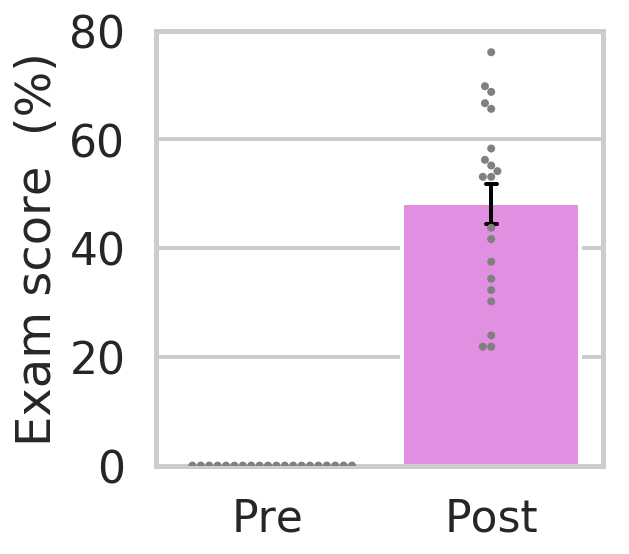

In [52]:
# plot
fig=plt.figure()
sns.set_style("whitegrid")
sns.set_context("poster")
f, ax = plt.subplots(1,1, figsize = (4,4))
g1=sns.barplot(data=prepost_df,color="violet",ci=68,errcolor='k',capsize=0.05,errwidth=2)
g1=sns.swarmplot(data=prepost_df,color="gray",size=4)
g1.set_ylim(0,80)  
#g1.set_xlabel("Exam",fontsize=24)
g1.set_ylabel("Exam score  (%)",fontsize=24)
#save_filename=join(output_path,'pinkbar_20students_prepost.ps')
#plt.savefig(save_filename,dpi=150)
#save_filename=join(output_path,'pinkbar_20students_prepost.png')
#plt.savefig(save_filename,dpi=150)
#print('Saved in {}'.format(output_path))


In [ ]:
#Figure data saved as 
#/mnt/sink/scratch/my_name/fig_data/fig1_data.tsv